# 프로젝트 :  고양이 수염 만들기

## 스티커 구하기, 만들기

## 얼굴검출, 랜드마크 검출하기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

* cv2로 읽은후 BGR을 RGB로 변경후 이미지 확인

In [2]:
face_image = os.getenv('HOME')+"/aiffel/camera_sticker/images/face.jpg"

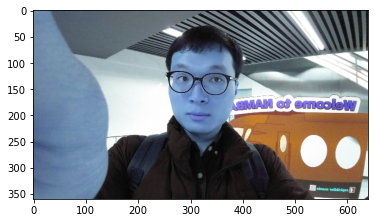

In [3]:
face_bgr = cv2.imread(face_image)
face_bgr = cv2.resize(face_bgr, (640, 360)) # 4:3 사이즈로 resize
face_bgr1 = face_bgr.copy() # 만약을 대비해 백업
plt.imshow(face_bgr1)
plt.show()


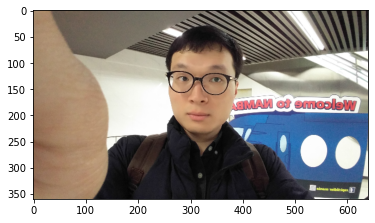

In [4]:
face_rgb = cv2.cvtColor(face_bgr1, cv2.COLOR_BGR2RGB)
face_rgb1 = face_rgb.copy() #백업2
plt.imshow(face_rgb)
plt.show()

* 얼굴박스 검출

In [5]:
import dlib
detector_hog = dlib.get_frontal_face_detector() #detector선언

In [6]:
dlib_rects = detector_hog(face_rgb, 1) #(image, num of img pyramid)

In [7]:
print(dlib_rects)   # 찾은 얼굴영역 좌표(??)

rectangles[[(236, 98) (390, 253)]]


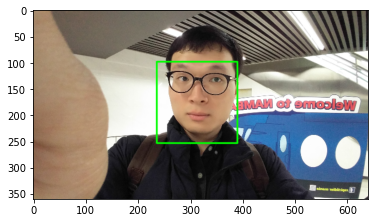

In [8]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(face_rgb1, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

#face_show_rgb =  cv2.cvtColor(face_bgr, cv2.COLOR_BGR2RGB) #bgr백업한 것을 Rgb로 변환
plt.imshow(face_rgb1)
plt.show()

* 얼굴 랜드마크 찾기

In [9]:
# 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [10]:
list_landmarks = []
for dlib_rect in dlib_rects: #dlib_rects 얼굴box
    points = landmark_predictor(face_rgb1, dlib_rect)
    list_points = list(map(lambda p: (p.x,p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


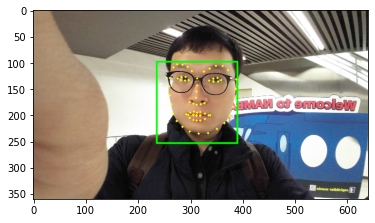

In [11]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(face_rgb1, point, 2, (255,255,0), -1) # yellow
        
plt.imshow(face_rgb1)
plt.show()

## 스티커 적용위치 확인하기

In [12]:
dlib_rect ,dlib_rect.width()

(rectangle(236,98,390,253), 155)

In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
   
    print ('(x,y) : (%d,%d)'%(x,y))

(311, 167)
(x,y) : (311,167)


In [14]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
cat_sticker = cv2.imread(sticker_path)
cat_sticker = cv2.resize(cat_sticker, (155,155))
print (cat_sticker.shape)

(155, 155, 3)


* 박스의 가운데에 스티커를 위치시키면 될 것이다.

In [15]:
w = dlib_rect.width()//2

In [16]:
refined_x = x - w   # left
refined_y = y -w      # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (234,90)


## 스티커 적용하기

In [17]:
sticker_area = face_rgb1[refined_y:refined_y+cat_sticker.shape[0], refined_x:refined_x+cat_sticker.shape[1]]
face_rgb1[refined_y:refined_y+cat_sticker.shape[0], refined_x:refined_x+cat_sticker.shape[1]] = \
    np.where(cat_sticker==255,sticker_area,cat_sticker).astype(np.uint8) #cat이미지가 존재하면 사용, 아니면 배경이미지사용

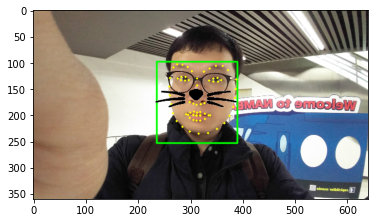

In [18]:
plt.imshow(face_rgb1)
plt.show()

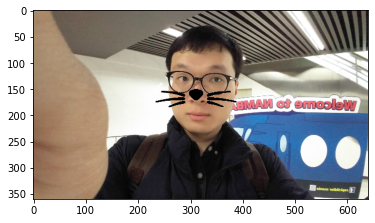

In [19]:
sticker_area = face_rgb[refined_y:refined_y+cat_sticker.shape[0], refined_x:refined_x+cat_sticker.shape[1]]
face_rgb[refined_y:refined_y+cat_sticker.shape[0], refined_x:refined_x+cat_sticker.shape[1]] = \
    np.where(cat_sticker==255,sticker_area,cat_sticker).astype(np.uint8)
plt.imshow(face_rgb)
plt.show()